In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.impute import MissingIndicator, SimpleImputer, KNNImputer
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, cross_validate
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
def plot_feature_importances(model):
    n_features = X_train_processed.shape[1]
    plt.figure(figsize=(12,50))
    plt.barh(range(n_features), model.feature_importances_, align='edge') 
    plt.yticks(np.arange(n_features), X_train_processed.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')



In [53]:
def evaluation(y, y_hat, title = 'Confusion Matrix'):
    '''takes in true values and predicted values.
    The function then prints out a classifcation report
    as well as a confusion matrix using seaborn's heatmap.'''
    cm = confusion_matrix(y, y_hat)
    precision = precision_score(y, y_hat, average = 'weighted')
    recall = recall_score(y, y_hat, average = 'weighted')
    accuracy = accuracy_score(y,y_hat)
    print(classification_report(y, y_hat))
    print('Accurancy: ', accuracy)
    sns.heatmap(cm,  cmap= 'Greens', annot=True)
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.title(title)
    plt.show()

In [155]:
# train = f.load_processed_train_df()
# test = f.load_test_df()
train = pd.read_csv('../data/processed_data.csv')
train.permit = train.permit.astype(str)

In [156]:
X = train.drop(['id', 'status_group', 'status', 'date_recorded'], axis=1)
y = train.status
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [157]:
ohe_features = ['funder/installer', 'region_bins',
               'public_meeting', 'lga_coded',
               'scheme_management/management', 'permit', 
               'extraction_type/group/class', 
               'payment', 'quality_group',
               'quantity', 'source_type', 'waterpoint_type/group']

In [158]:
cont_features = ['gps_height', 'population'
                 ]

decade_features = ['2000-2010', '1990-2000', '1980-1990',
                   '2010-2020', '1970-1980', '1960-1970']

In [159]:
X_train_ohe = X_train[ohe_features]
X_test_ohe = X_test[ohe_features]
X_train_cont = X_train[cont_features].astype(float)
X_test_cont = X_test[cont_features].astype(float)

In [160]:
X_train_index = X_train.index
X_test_index = X_test.index

In [161]:
ohe = OneHotEncoder()
ss = StandardScaler()
X_train_encoded = ohe.fit_transform(X_train_ohe)
X_test_encoded = ohe.transform(X_test_ohe)
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train_cont), columns=X_train[cont_features].columns, index=X_train_index)
X_test_scaled = pd.DataFrame(ss.transform(X_test_cont), columns=X_test[cont_features].columns, index=X_test_index)

In [162]:
train_columns = ohe.get_feature_names(input_features=X_train_ohe.columns)
test_columns = ohe.get_feature_names(input_features=X_test_ohe.columns)
X_train_processed = pd.DataFrame(X_train_encoded.todense(), columns=train_columns, index=X_train_index)
X_test_processed = pd.DataFrame(X_test_encoded.todense(), columns=test_columns, index=X_test_index)

In [163]:
X_train_all = pd.concat([X_train_scaled, X_train_processed], axis=1)
X_test_all = pd.concat([X_test_scaled, X_test_processed], axis=1)


In [164]:
X_train_all = X_train_all.join(X_train[decade_features])
X_test_all = X_test_all.join(X_test[decade_features])

In [165]:
X_train_all.isna().sum()

gps_height                  0
population                  0
funder/installer_adb/dwe    0
funder/installer_amref      0
funder/installer_binned     0
                           ..
1990-2000                   0
1980-1990                   0
2010-2020                   0
1970-1980                   0
1960-1970                   0
Length: 144, dtype: int64

In [120]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train_all, y_train)

RandomForestClassifier(n_estimators=1000)

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      5678
           1       0.48      0.33      0.39      1074
           2       0.80      0.86      0.83      8098

    accuracy                           0.78     14850
   macro avg       0.69      0.65      0.67     14850
weighted avg       0.78      0.78      0.78     14850

Accurancy:  0.7832996632996633


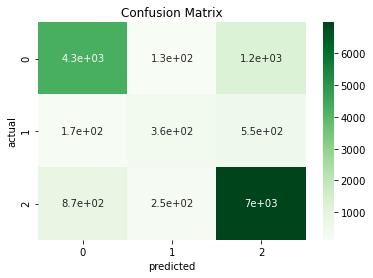

In [124]:
evaluation(y_test, rf.predict(X_test_all))

In [125]:
confusion_matrix(y_train, rf.predict(X_train_all))

array([[16046,   111,   989],
       [  110,  2622,   511],
       [  450,   154, 23557]], dtype=int64)

In [25]:
confusion_matrix(y_test, rf.predict(X_test_all))

array([[4247,  128, 1303],
       [ 166,  343,  565],
       [ 817,  268, 7013]], dtype=int64)

In [34]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_processed, y_train)

MultinomialNB()

In [32]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train_all, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000)

In [36]:
confusion_matrix(y_test, rf.predict(X_test_all))

array([[4238,  125, 1315],
       [ 169,  343,  562],
       [ 824,  265, 7009]], dtype=int64)